(supervised:svm:scikit-learn)=
# SVMs with Scikit-Learn

With [`LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) Scikit-Learn offers a fast and well scaling implementation of linear SVMs for classification. For kernel SVMs there is [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

`SVC` by default uses the RBF kernel with $\gamma$ adapted to the variance of the training feature values. Weighting between margin width and correct classification is controlled by the parameter `C` which is $\frac{1}{\alpha}$. After fitting, the classifier object provides access to the support vectors and to the decision function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import sklearn.svm as svm

rng = np.random.default_rng(0)

We generate synthetic data with two classes, which are not linearly separable.

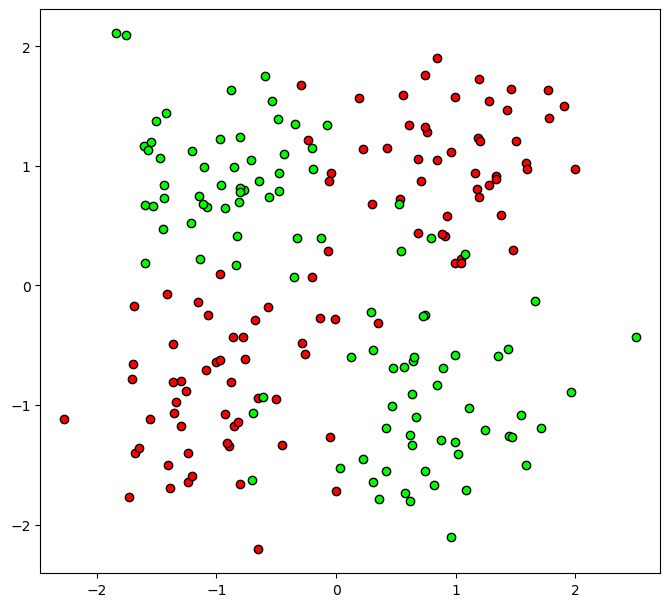

In [2]:
n0 = 100    # samples in class 0
n1 = 100    # samples in class 1

# generate two point clouds
X0a = rng.multivariate_normal([-1, -1], [[0.3, 0], [0, 0.3]], size=n0 // 2)
X0b = rng.multivariate_normal([1, 1], [[0.3, 0], [0, 0.3]], size=n0 // 2)
X1a = rng.multivariate_normal([1, -1], [[0.3, 0], [0, 0.3]], size=n1 // 2)
X1b = rng.multivariate_normal([-1, 1], [[0.3, 0], [0, 0.3]], size=n1 // 2)
X = np.concatenate((X0a, X0b, X1a, X1b))

# set labels
y0 = -np.ones(n0)
y1 = np.ones(n1)
y = np.concatenate((y0, y1))

# set plotting region
x0_min = X[:, 0].min() - 0.2
x0_max = X[:, 0].max() + 0.2
x1_min = X[:, 1].min() - 0.2
x1_max = X[:, 1].max() + 0.2

# plot data set
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[y == -1, 0], X[y == -1, 1], c='#ff0000', edgecolor='black')
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='#00ff00', edgecolor='black')
ax.set_xlim(x0_min, x0_max)
ax.set_ylim(x1_min, x1_max)
ax.set_aspect('equal')
plt.show()

Classification accuracy can be controlled via $\alpha$ and $\gamma$. The higher $\alpha$ the wider the margin. The lower $\alpha$ the more accurate the classifications. Small $\gamma$ yields smooth but possibly imprecise decision boundaries. For large $\gamma$ decision boundaries are fit more tightly to the training data, resulting in more accurate predictions on training data.

Small $\alpha$ and/or large $\gamma$ may result in overfitting.

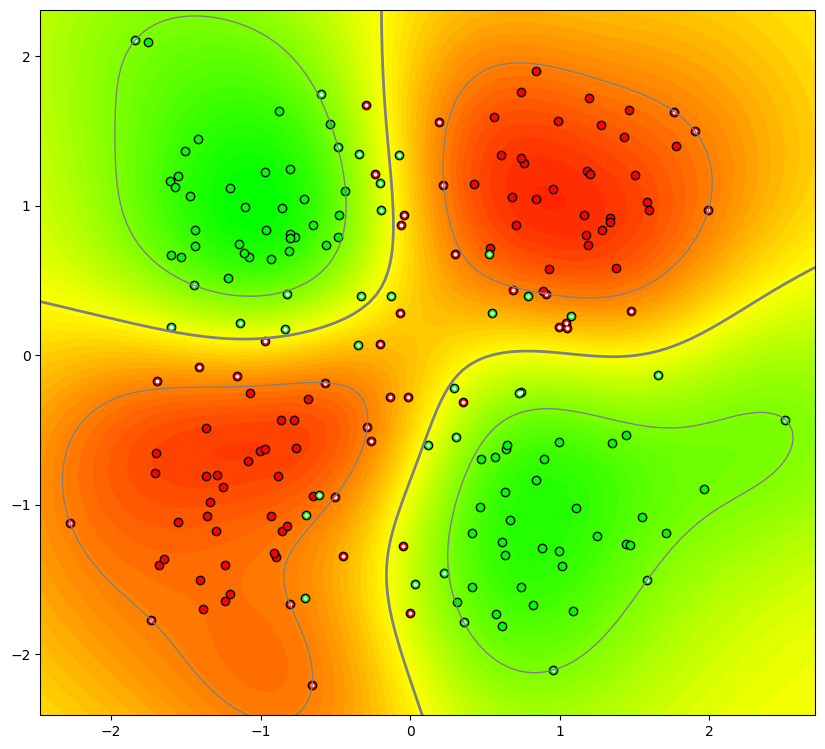

In [3]:
alpha = 1
gamma = 1

svc = svm.SVC(C=1/alpha, gamma=gamma)
svc.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 10))

# plot model (function values color-coded)
x0, x1 = np.meshgrid(np.linspace(x0_min, x0_max, 100), np.linspace(x1_min, x1_max, 100))
y_grid = svc.decision_function(np.stack((x0.reshape(-1), x1.reshape(-1)), axis=1)).reshape(100, 100)
max_y = np.max(np.abs(y_grid))
cm = matplotlib.colors.LinearSegmentedColormap.from_list('ryg', ['#ff0000', '#ffff00', '#00ff00'])
ax.contourf(x0, x1, y_grid, cmap=cm, levels=np.linspace(-max_y, max_y, 50))

# plot decision boundary and margin
ax.contour(x0, x1, y_grid, levels=[-1, 0, 1], linewidths=[1, 2, 1], colors=3*['#808080'])

# plot data set
ax.scatter(X[y == -1, 0], X[y == -1, 1], c='#ff0000', edgecolor='black')
ax.scatter(X[y == 1, 0], X[y == 1, 1], c='#00ff00', edgecolor='black')

# plot support vectors
X_supp = X[svc.support_]
ax.scatter(X_supp[:, 0], X_supp[:, 1], c='#ffffff', marker='o', s=3)

ax.set_xlim(x0_min, x0_max)
ax.set_ylim(x1_min, x1_max)
ax.set_aspect('equal')

plt.show()